In [1]:
# ==============================
# 📈 Stock Price Predictor
# ==============================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------
# Step 2: Download Stock Data
# ------------------------------
ticker = "AAPL"   # You can change to TSLA, MSFT, etc.
start_date = "2020-01-01"
end_date = "2023-12-31"

data = yf.download(ticker, start=start_date, end=end_date)
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17400\4216650304.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB
None
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1006.000000  1006.000000  1006.000000  1006.000000  1.006000e+03
mean     138.220942   139.704823   136.588527   138.090655  9.895373e+07
std       33.421410    33.541732    33.282002    33.415134  5.439610e+07
min       54.316929    55.316747    51.469994    55.215071  2.404830e+07
25%      120.626507   121.869867   119.090675   120.732251  6.40767

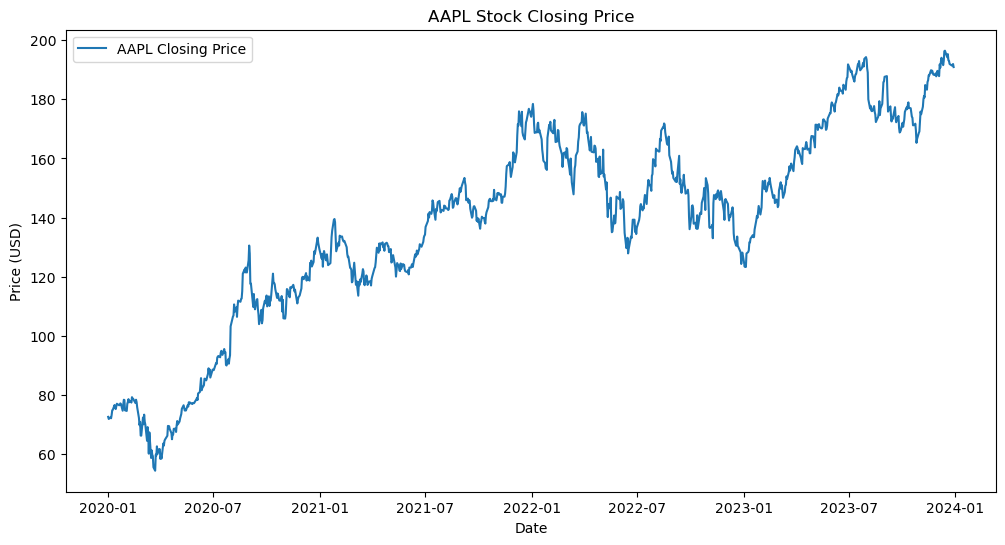

In [2]:
# ------------------------------
# Step 3: Data Exploration
# ------------------------------
print(data.info())
print(data.describe())

# Plot closing price over time
plt.figure(figsize=(12,6))
plt.plot(data["Close"], label=f"{ticker} Closing Price")
plt.title(f"{ticker} Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [3]:
# ------------------------------
# Step 4: Feature Engineering
# ------------------------------
# Create new features (Moving Average)
data["MA10"] = data["Close"].rolling(10).mean()
data["MA20"] = data["Close"].rolling(20).mean()

# Drop rows with NaN values (from rolling)
data = data.dropna()

# Features (X) and Target (y)
X = data[["Open", "High", "Low", "Volume", "MA10", "MA20"]]
y = data["Close"]

X.head()

Price,Open,High,Low,Volume,MA10,MA20
Ticker,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,
2020-01-30,77.414659,78.272028,76.982348,126743200,76.816437,75.360958
2020-01-31,77.508856,77.931504,74.456132,199588400,76.678051,75.471572
2020-02-03,73.492470,75.711977,72.990125,173788400,76.434846,75.607180
2020-02-04,76.151549,77.197305,75.745808,136616400,76.489909,75.837221
2020-02-05,78.134372,78.433854,77.030662,118826800,76.580476,76.115686


In [4]:
# ------------------------------
# Step 5: Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (789, 6)
Testing set size: (198, 6)


In [5]:
# ------------------------------
# Step 6: Train Model
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model Trained Successfully")

✅ Model Trained Successfully


In [6]:
# ------------------------------
# Step 7: Evaluate Model
# ------------------------------
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.86
R² Score: 1.00


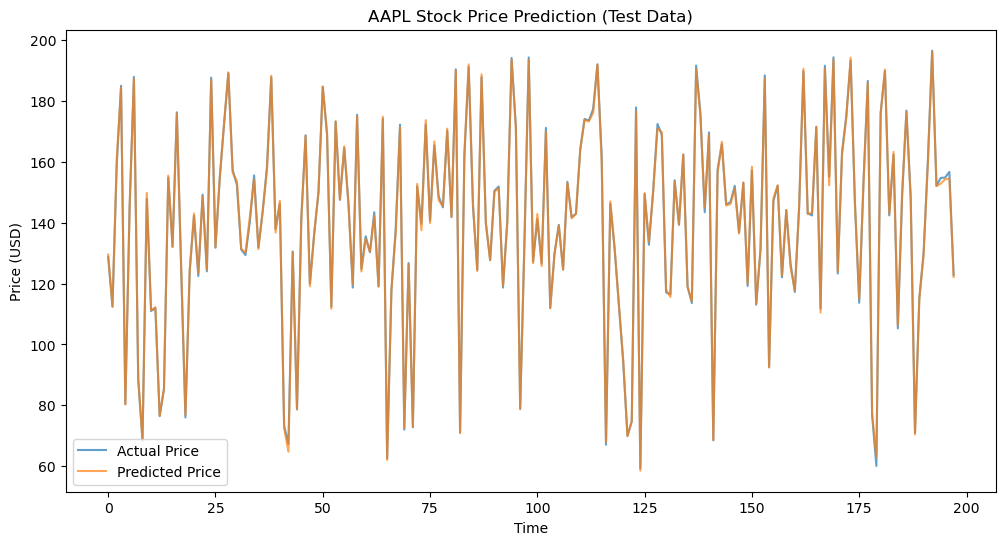

In [7]:
# ------------------------------
# Step 8: Visualize Predictions
# ------------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price", alpha=0.7)
plt.plot(y_pred, label="Predicted Price", alpha=0.7)
plt.title(f"{ticker} Stock Price Prediction (Test Data)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [10]:
# ------------------------------
# Step 9: Predict Future Price (Example)
# ------------------------------
last_row = data.tail(1)[["Open", "High", "Low", "Volume", "MA10", "MA20"]]
future_price = model.predict(last_row)

print(f"Predicted Next Closing Price for {ticker}: ${float(future_price[0]):.2f}")


Predicted Next Closing Price for AAPL: $190.85


C:\Users\Admin\AppData\Local\Temp\ipykernel_17400\2266182768.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Next Closing Price for {ticker}: ${float(future_price[0]):.2f}")
